# Logistic Regression - Loan model 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Problem Statemet

# Data Gathering

In [2]:
df = pd.read_csv('loan_data.csv.')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# Exploratorary Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### credit.policy

In [5]:
df['credit.policy']

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64

In [6]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [7]:
cre_pol_dict = {'LendingClub.com':1,'otherwise':0}
cre_pol_dict

{'LendingClub.com': 1, 'otherwise': 0}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### purpose

In [9]:
df['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [10]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [11]:
df['purpose'].value_counts().to_dict()

{'debt_consolidation': 3957,
 'all_other': 2331,
 'credit_card': 1262,
 'home_improvement': 629,
 'small_business': 619,
 'major_purchase': 437,
 'educational': 343}

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['purpose'] = label_encoder.fit_transform(df['purpose'])

In [13]:
df['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [14]:
purpose_dict = {'debt_consolidation': 2,
 'all_other': 0,
 'credit_card': 1,
 'home_improvement': 4,
 'small_business': 6,
 'major_purchase': 5,
 'educational': 3}
purpose_dict

{'debt_consolidation': 2,
 'all_other': 0,
 'credit_card': 1,
 'home_improvement': 4,
 'small_business': 6,
 'major_purchase': 5,
 'educational': 3}

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### int.rate

In [16]:
df['int.rate']

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64

In [17]:
df['int.rate'].value_counts()

0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### installment

In [19]:
df['installment']

0       829.10
1       228.22
2       366.86
3       162.34
4       102.92
         ...  
9573    344.76
9574    257.70
9575     97.81
9576    351.58
9577    853.43
Name: installment, Length: 9578, dtype: float64

In [20]:
df['installment'].value_counts()

317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### log.annual.inc

In [22]:
df['log.annual.inc']

0       11.350407
1       11.082143
2       10.373491
3       11.350407
4       11.299732
          ...    
9573    12.180755
9574    11.141862
9575    10.596635
9576    10.819778
9577    11.264464
Name: log.annual.inc, Length: 9578, dtype: float64

In [23]:
df['log.annual.inc'].value_counts()

11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: log.annual.inc, Length: 1987, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### dti

In [25]:
df['dti']

0       19.48
1       14.29
2       11.63
3        8.10
4       14.97
        ...  
9573    10.39
9574     0.21
9575    13.09
9576    19.18
9577    16.28
Name: dti, Length: 9578, dtype: float64

In [26]:
df['dti'].value_counts()

0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.90      1
19.74     1
29.15     1
1.09      1
24.05     1
Name: dti, Length: 2529, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### fico

In [28]:
df['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 9578, dtype: int64

In [29]:
df['fico'].value_counts()

687    548
682    536
692    498
697    476
702    472
707    444
667    438
677    427
717    424
662    414
712    395
672    395
722    388
727    361
732    330
742    324
737    313
752    258
747    236
757    231
762    220
772    158
767    142
777    140
652    131
657    127
782    118
647    112
642    102
792     97
787     85
797     76
802     55
807     45
812     33
632      6
817      6
822      5
637      5
627      2
612      2
827      1
617      1
622      1
Name: fico, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### days.with.cr.line

In [31]:
df['days.with.cr.line']

0        5639.958333
1        2760.000000
2        4710.000000
3        2699.958333
4        4066.000000
            ...     
9573    10474.000000
9574     4380.000000
9575     3450.041667
9576     1800.000000
9577     4740.000000
Name: days.with.cr.line, Length: 9578, dtype: float64

In [32]:
df['days.with.cr.line'].value_counts()

3660.000000     50
3630.000000     48
3990.000000     46
4410.000000     44
3600.000000     41
                ..
9395.000000      1
5613.958333      1
2884.000000      1
1728.000000      1
10474.000000     1
Name: days.with.cr.line, Length: 2687, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### revol.bal

In [34]:
df['revol.bal']

0        28854
1        33623
2         3511
3        33667
4         4740
         ...  
9573    215372
9574       184
9575     10036
9576         0
9577     37879
Name: revol.bal, Length: 9578, dtype: int64

In [35]:
df['revol.bal'].value_counts()

0        321
298       10
255       10
682        9
346        8
        ... 
24876      1
14588      1
9866       1
13450      1
37879      1
Name: revol.bal, Length: 7869, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### revol.util

In [37]:
df['revol.util']

0       52.1
1       76.7
2       25.6
3       73.2
4       39.5
        ... 
9573    82.1
9574     1.1
9575    82.9
9576     3.2
9577    57.0
Name: revol.util, Length: 9578, dtype: float64

In [38]:
df['revol.util'].value_counts()

0.00     297
0.50      26
47.80     22
0.30      22
73.70     22
        ... 
49.63      1
0.04       1
91.40      1
7.28       1
69.14      1
Name: revol.util, Length: 1035, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### inq.last.6mths

In [40]:
df['inq.last.6mths']

0       0
1       0
2       1
3       1
4       0
       ..
9573    2
9574    5
9575    8
9576    5
9577    6
Name: inq.last.6mths, Length: 9578, dtype: int64

In [41]:
df['inq.last.6mths'].value_counts()

0     3637
1     2462
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
15       9
13       6
14       6
18       4
16       3
19       2
24       2
17       2
33       1
20       1
27       1
25       1
28       1
31       1
32       1
Name: inq.last.6mths, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### delinq.2yrs

In [43]:
df['delinq.2yrs']

0       0
1       0
2       0
3       0
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: delinq.2yrs, Length: 9578, dtype: int64

In [44]:
df['delinq.2yrs'].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: delinq.2yrs, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


### pub.rec

In [46]:
df['pub.rec']

0       0
1       0
2       0
3       0
4       0
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: pub.rec, Length: 9578, dtype: int64

In [47]:
df['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


In [49]:
df['not.fully.paid'].value_counts()   # imbalance data  # bais data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [50]:
# df['not.fully.paid'].replace({0:'no',1:'yes'},inplace = True)

# Feature Engineering

<AxesSubplot:>

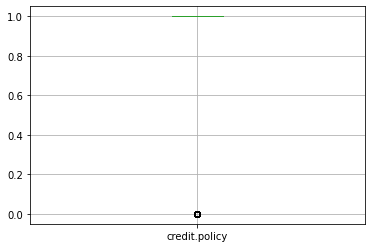

In [51]:
df[['credit.policy']].boxplot() # 1

<AxesSubplot:>

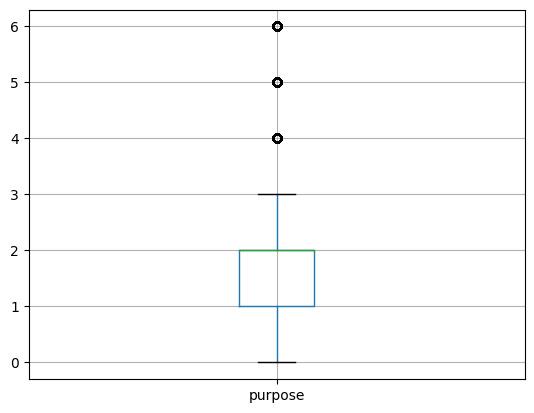

In [52]:
df[['purpose']].boxplot() # 2

q1--> 1.0
q2--> 2.0
q3--> 2.0
upper_tail--> 3.5
lower_tail--> -0.5
mean--> 1.9440384213823345
2.0


<AxesSubplot:>

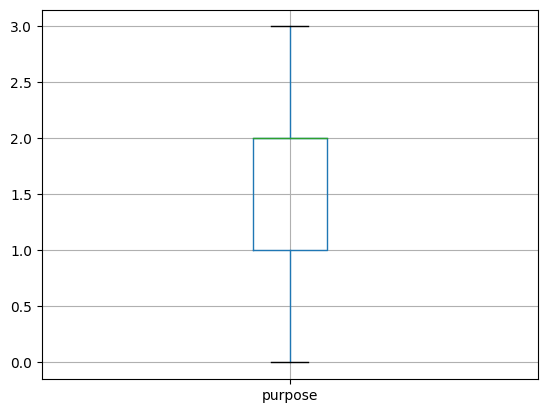

In [53]:
q1=df['purpose'].quantile(0.25)
q2=df['purpose'].quantile(0.50)
q3=df['purpose'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['purpose'].mean()))

df['purpose'].median()

size_df=df[['purpose']].loc[(df['purpose'] < upper_tail) & 
                                   (df['purpose'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['purpose'] > upper_tail) |
                (df['purpose'] < lower_tail), 'purpose'] = size_df


df[['purpose']].boxplot()

<AxesSubplot:>

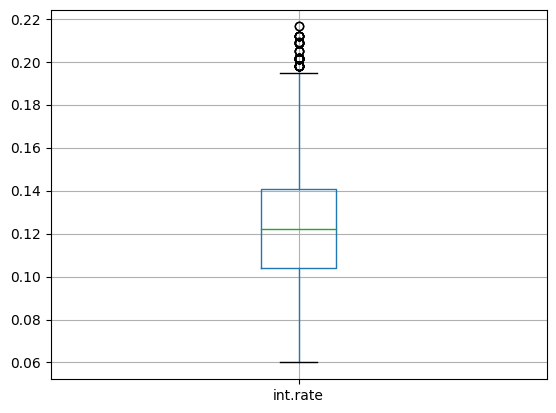

In [54]:
df[['int.rate']].boxplot() # 3

q1--> 0.1039
q2--> 0.1221
q3--> 0.1407
upper_tail--> 0.19589999999999996
lower_tail--> 0.04870000000000003
mean--> 0.12264006055543955
0.1221


<AxesSubplot:>

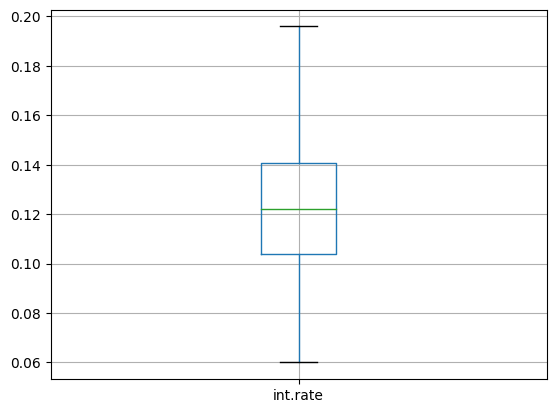

In [55]:
q1=df['int.rate'].quantile(0.25)
q2=df['int.rate'].quantile(0.50)
q3=df['int.rate'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['int.rate'].mean()))

df['int.rate'].median()

size_df=df[['int.rate']].loc[(df['int.rate'] < upper_tail) & 
                                   (df['int.rate'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['int.rate'] > upper_tail) |
                (df['int.rate'] < lower_tail), 'int.rate'] = upper_tail


df[['int.rate']].boxplot()


<AxesSubplot:>

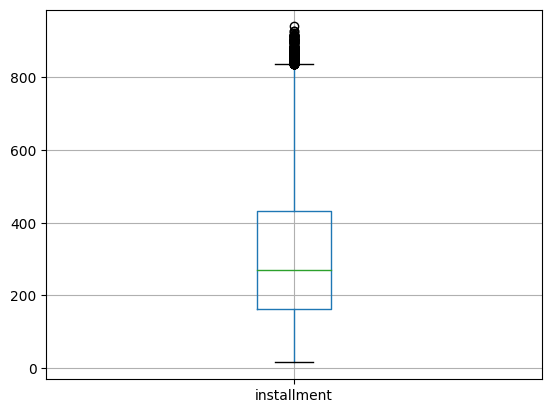

In [56]:
df[['installment']].boxplot() # 4

q1--> 163.77
q2--> 268.95
q3--> 432.7625
upper_tail--> 836.2512499999999
lower_tail--> -239.71874999999991
mean--> 319.08941323867197
263.735


<AxesSubplot:>

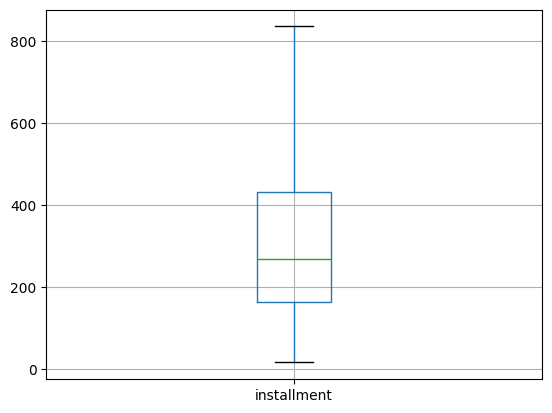

In [57]:
q1=df['installment'].quantile(0.25)
q2=df['installment'].quantile(0.50)
q3=df['installment'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['installment'].mean()))

df['installment'].median()

size_df=df[['installment']].loc[(df['installment'] < upper_tail) & 
                                   (df['installment'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['installment'] > upper_tail) |
                (df['installment'] < lower_tail), 'installment'] = upper_tail


df[['installment']].boxplot()

<AxesSubplot:>

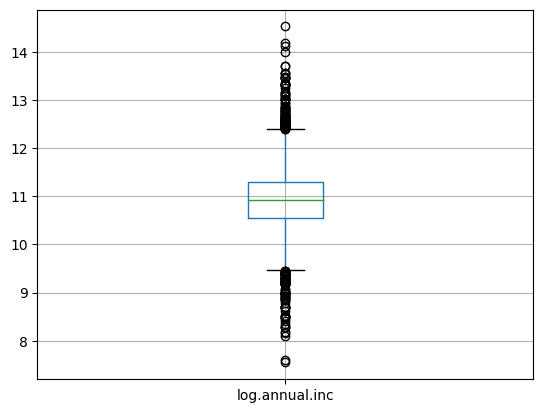

In [58]:
df[['log.annual.inc']].boxplot() # 5

q1--> 10.55841352
q2--> 10.92888357
q3--> 11.2912929175
upper_tail--> 12.39061201375
lower_tail--> 9.45909442375
mean--> 10.93211713780027
10.927555865


<AxesSubplot:>

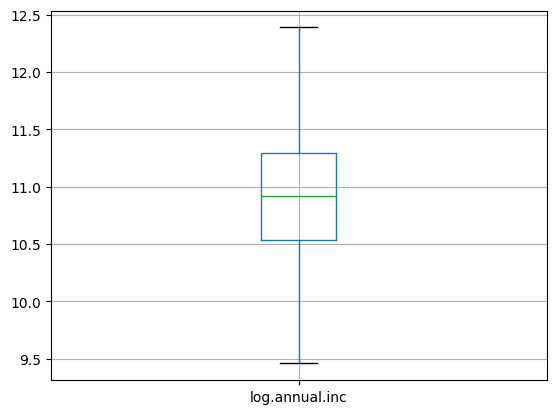

In [59]:
q1=df['log.annual.inc'].quantile(0.25)
q2=df['log.annual.inc'].quantile(0.50)
q3=df['log.annual.inc'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['log.annual.inc'].mean()))

df['log.annual.inc'].median()

size_df=df[['log.annual.inc']].loc[(df['log.annual.inc'] < upper_tail) & 
                                   (df['log.annual.inc'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['log.annual.inc'] > upper_tail) |
                (df['log.annual.inc'] < lower_tail), 'log.annual.inc'] = lower_tail


df[['log.annual.inc']].boxplot()

<AxesSubplot:>

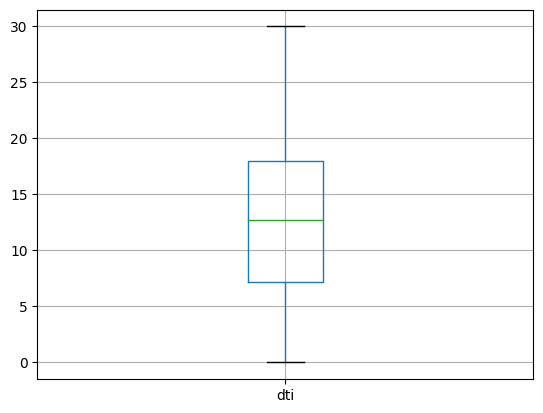

In [60]:
df[['dti']].boxplot()# 6

<AxesSubplot:>

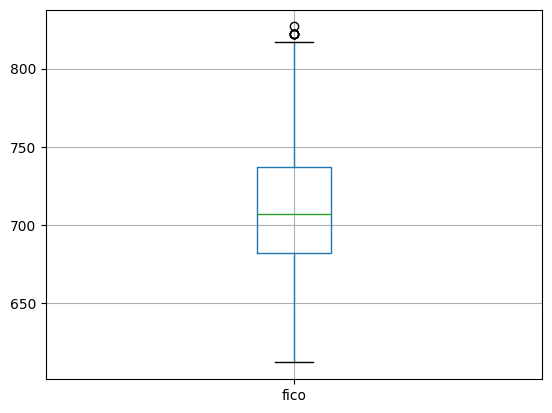

In [61]:
df[['fico']].boxplot() # 7

q1--> 682.0
q2--> 707.0
q3--> 737.0
upper_tail--> 819.5
lower_tail--> 599.5
mean--> 710.8463144706619
707.0


<AxesSubplot:>

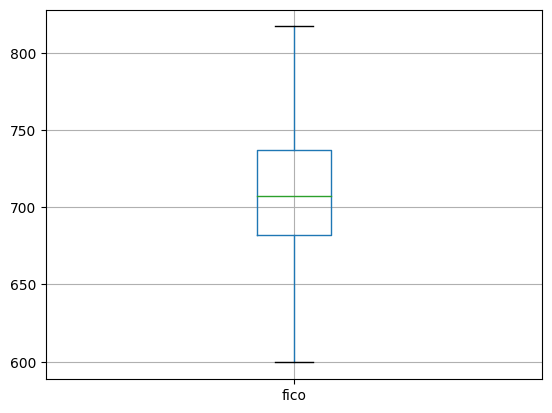

In [62]:
q1=df['fico'].quantile(0.25)
q2=df['fico'].quantile(0.50)
q3=df['fico'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['fico'].mean()))

df['fico'].median()

size_df=df[['fico']].loc[(df['fico'] < upper_tail) & 
                                   (df['fico'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['fico'] > upper_tail) |
                (df['fico'] < lower_tail), 'fico'] = lower_tail


df[['fico']].boxplot()

<AxesSubplot:>

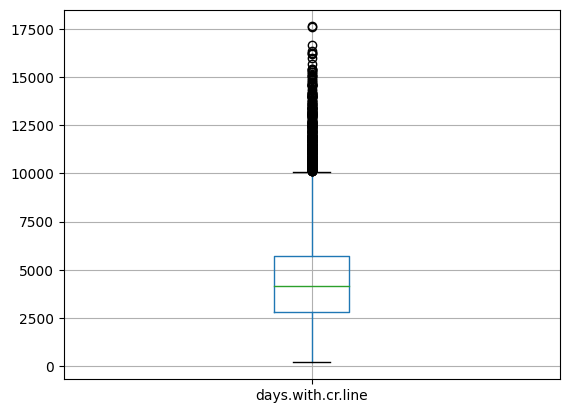

In [63]:
df[['days.with.cr.line']].boxplot() # 8

q1--> 2820.0
q2--> 4139.958333
q3--> 5730.0
upper_tail--> 10095.0
lower_tail--> -1545.0
mean--> 4560.767196529213
4050.0


<AxesSubplot:>

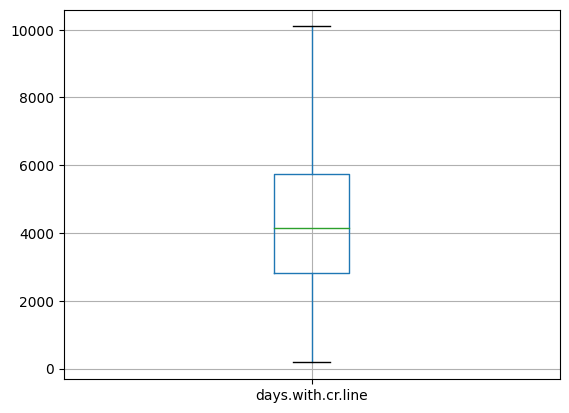

In [64]:
q1=df['days.with.cr.line'].quantile(0.25)
q2=df['days.with.cr.line'].quantile(0.50)
q3=df['days.with.cr.line'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['days.with.cr.line'].mean()))

df['days.with.cr.line'].median()

size_df=df[['days.with.cr.line']].loc[(df['days.with.cr.line'] < upper_tail) & 
                                   (df['days.with.cr.line'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['days.with.cr.line'] > upper_tail) |
                (df['days.with.cr.line'] < lower_tail), 'days.with.cr.line'] = upper_tail


df[['days.with.cr.line']].boxplot()

<AxesSubplot:>

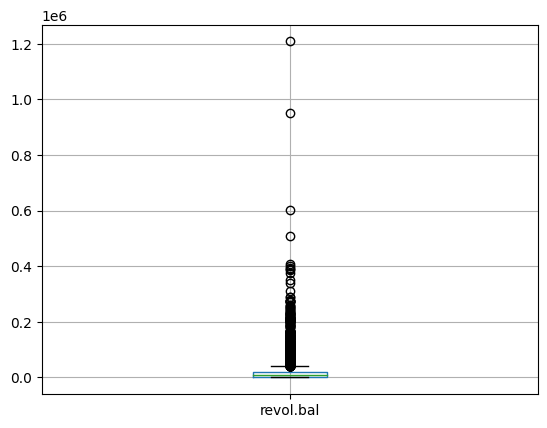

In [65]:
df[['revol.bal']].boxplot() # 9

q1--> 3187.0
q2--> 8596.0
q3--> 18249.5
upper_tail--> 40843.25
lower_tail--> -19406.75
mean--> 16913.963875548132
7513.0


<AxesSubplot:>

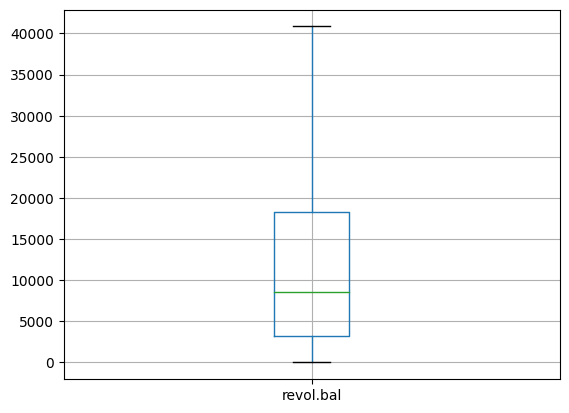

In [66]:
q1=df['revol.bal'].quantile(0.25)
q2=df['revol.bal'].quantile(0.50)
q3=df['revol.bal'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['revol.bal'].mean()))

df['revol.bal'].median()

size_df=df[['revol.bal']].loc[(df['revol.bal'] < upper_tail) & 
                                   (df['revol.bal'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['revol.bal'] > upper_tail) |
                (df['revol.bal'] < lower_tail), 'revol.bal'] = upper_tail


df[['revol.bal']].boxplot()

<AxesSubplot:>

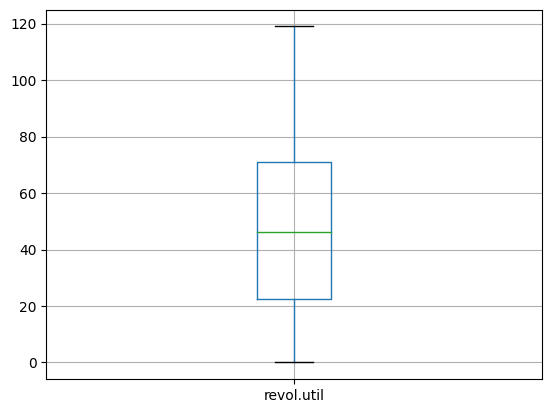

In [67]:
df[['revol.util']].boxplot() # 10

<AxesSubplot:>

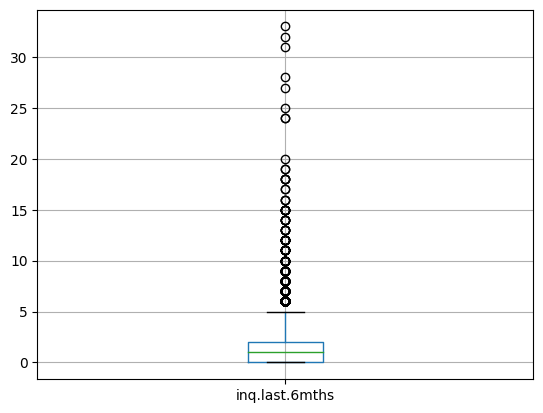

In [68]:
df[['inq.last.6mths']].boxplot() # 11

q1--> 0.0
q2--> 1.0
q3--> 2.0
upper_tail--> 5.0
lower_tail--> -3.0
mean--> 1.5774692002505741
1.0


<AxesSubplot:>

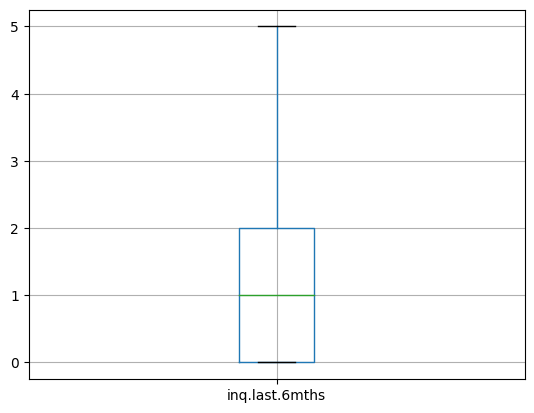

In [69]:
q1=df['inq.last.6mths'].quantile(0.25)
q2=df['inq.last.6mths'].quantile(0.50)
q3=df['inq.last.6mths'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['inq.last.6mths'].mean()))

df['inq.last.6mths'].median()

size_df=df[['inq.last.6mths']].loc[(df['inq.last.6mths'] < upper_tail) & 
                                   (df['inq.last.6mths'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['inq.last.6mths'] > upper_tail) |
                (df['inq.last.6mths'] < lower_tail), 'inq.last.6mths'] = size_df


df[['inq.last.6mths']].boxplot()

<AxesSubplot:>

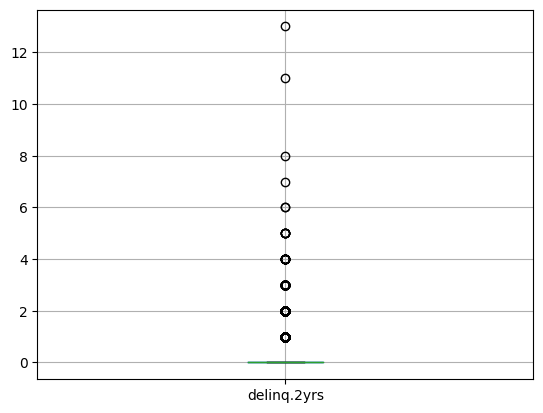

In [70]:
df[['delinq.2yrs']].boxplot() # 12

<AxesSubplot:>

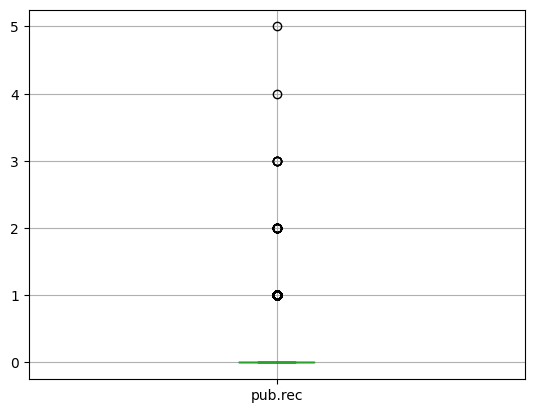

In [71]:
df[['pub.rec']].boxplot() # 13

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   float64
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   float64
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(8), int32(1), int64(5)
memory usage: 1010.3 KB


# Feature Selection

In [73]:
df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.016640,-0.293919,0.060490,0.059252,-0.090901,0.346518,0.107183,-0.064491,-0.104095,-0.374019,-0.076318,-0.054243,-0.158119
purpose,0.016640,1.000000,0.130742,0.175381,0.026758,0.081372,-0.063411,0.030497,0.079862,0.087275,0.003117,-0.013098,0.020778,0.013442
int.rate,-0.293919,0.130742,1.000000,0.272391,0.041182,0.221174,-0.711446,-0.127816,0.141327,0.466440,0.124045,0.156110,0.098399,0.159463
installment,0.060490,0.175381,0.272391,1.000000,0.395285,0.050109,0.087638,0.194094,0.331165,0.080691,-0.007798,-0.004982,-0.033096,0.048704
log.annual.inc,0.059252,0.026758,0.041182,0.395285,1.000000,-0.005700,0.099518,0.326224,0.392352,0.051333,0.010610,0.033555,0.023874,-0.039479
dti,-0.090901,0.081372,0.221174,0.050109,-0.005700,1.000000,-0.236709,0.066075,0.338402,0.337109,0.026781,-0.021792,0.006209,0.037362
fico,0.346518,-0.063411,-0.711446,0.087638,0.099518,-0.236709,1.000000,0.260205,-0.076207,-0.535833,-0.129147,-0.215243,-0.146724,-0.149732
days.with.cr.line,0.107183,0.030497,-0.127816,0.194094,0.326224,0.066075,0.260205,1.000000,0.316453,-0.017003,-0.035114,0.085715,0.078789,-0.029747
revol.bal,-0.064491,0.079862,0.141327,0.331165,0.392352,0.338402,-0.076207,0.316453,1.000000,0.417738,0.007628,-0.058895,-0.047677,0.035042
revol.util,-0.104095,0.087275,0.466440,0.080691,0.051333,0.337109,-0.535833,-0.017003,0.417738,1.000000,-0.011376,-0.042740,0.066717,0.082088


<AxesSubplot:>

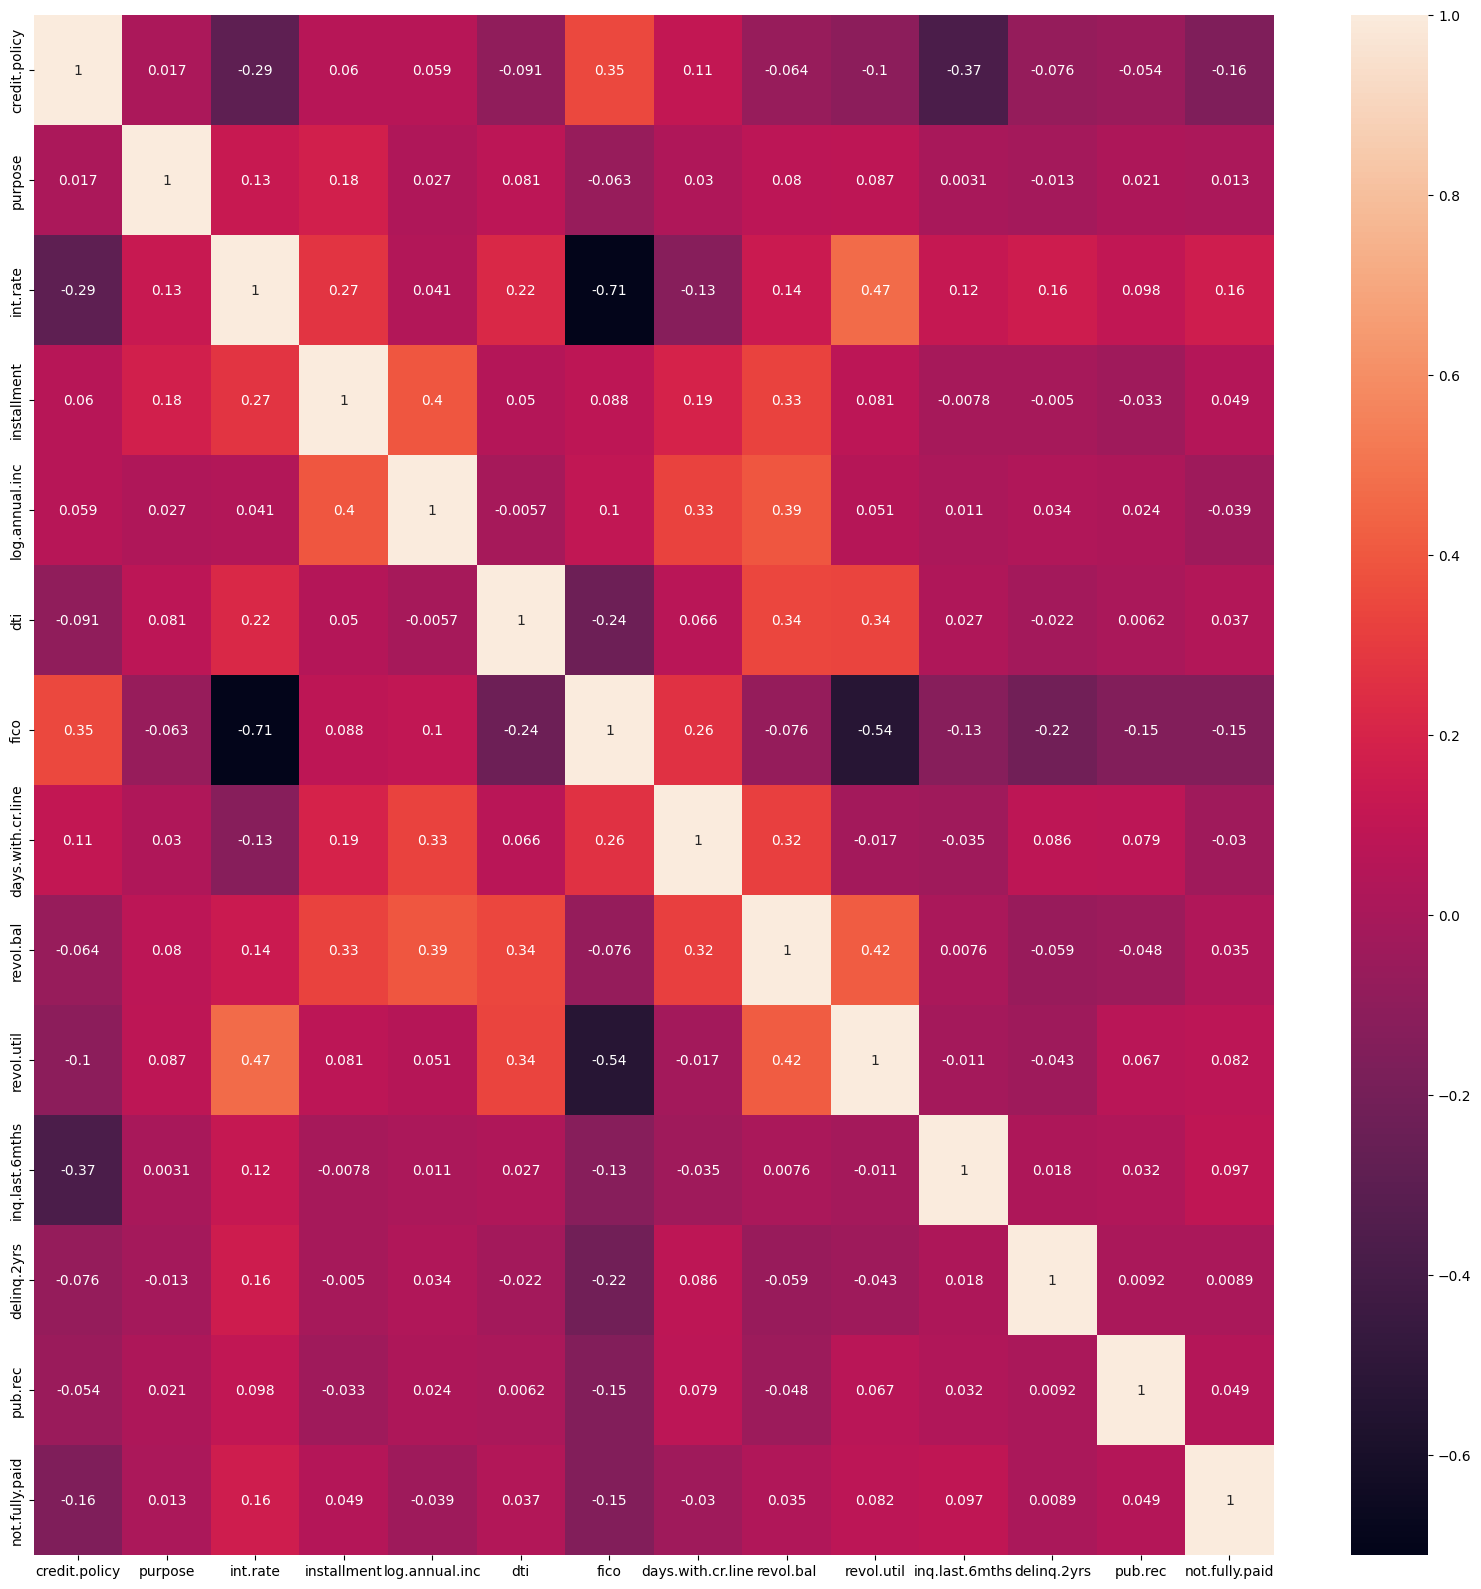

In [74]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

# Model Training

In [76]:
x = df.drop('not.fully.paid',axis = 1)
y = df['not.fully.paid']

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=1,stratify =y)

In [118]:
loan_model = LogisticRegression()
loan_model.fit(x_train,y_train)

LogisticRegression()

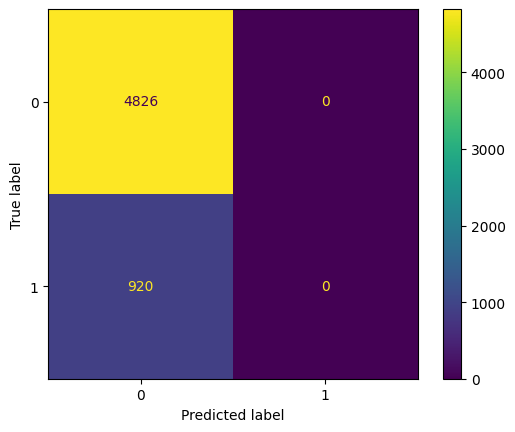

In [119]:
# Training Data
plot_confusion_matrix(loan_model, x_train, y_train)

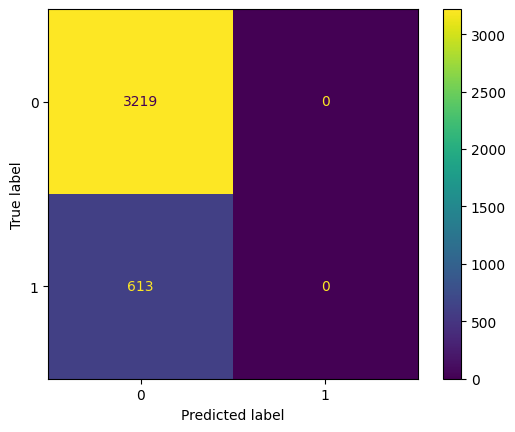

In [120]:
# Training Data
plot_confusion_matrix(loan_model, x_test, y_test)

In [121]:
# Training Accuracy
loan_model.score(x_train, y_train)

0.8398886181691612

In [122]:
# Testing Accuracy
loan_model.score(x_test, y_test)

0.8400313152400835

# Model Evaluation

In [123]:
# # prediction
y_pred = loan_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
# prediction probability
y_pred_proba = loan_model.predict_proba(x_test)
y_pred_proba

array([[0.83168292, 0.16831708],
       [0.7805017 , 0.2194983 ],
       [0.85000763, 0.14999237],
       ...,
       [0.86471358, 0.13528642],
       [0.81682095, 0.18317905],
       [0.80460026, 0.19539974]])

In [125]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[3219    0]
 [ 613    0]]
*********************************************
Accuracy Score: 0.8400313152400835
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.00      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832



In [126]:
# Training data

# prediction
y_pred_train = loan_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[4826    0]
 [ 920    0]]
*********************************************
Accuracy Score: 0.8398886181691612
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      4826
           1       0.00      0.00      0.00       920

    accuracy                           0.84      5746
   macro avg       0.42      0.50      0.46      5746
weighted avg       0.71      0.84      0.77      5746



# AUC-ROC Curve

In [127]:
# prediction probability
y_pred_proba = loan_model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

array([0.14319436, 0.08124295, 0.14947193, ..., 0.10608905, 0.17610502,
       0.0905355 ])

In [128]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

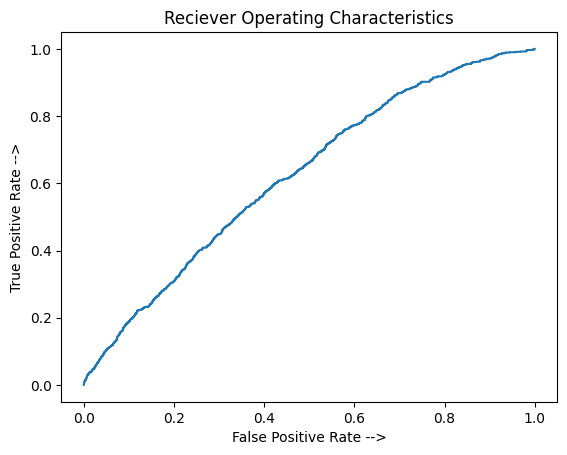

In [129]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Training on single row

In [131]:
x.head(1).T

,0
credit.policy,1.000000
purpose,2.000000
int.rate,0.118900
installment,829.100000
log.annual.inc,11.350407
dti,19.480000
fico,737.000000
days.with.cr.line,5639.958333
revol.bal,28854.000000
revol.util,52.100000


In [132]:
x.head(1).T.shape

(13, 1)

In [133]:
columns = x.columns
print(columns)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')


In [134]:
len(columns)

13

In [135]:
cre_pol_dict = {'LendingClub.com':1,'otherwise':0}
purpose_dict = {'debt_consolidation': 2,'all_other': 0,'credit_card': 1,'home_improvement': 4,
                'small_business': 6,'major_purchase': 5,'educational': 3}

In [148]:
# user intput
credit_policy = 'LendingClub.com'
purpose = 'small_business'
int_rate = 0.118900
installment = 829.10
log_annual_inc = 11.35
dti = 19.48
fico = 737
days_with_cr_line = 5639.95
revol_bal = 28854
revol_util = 52.10
inq_last_six_mths = 6
delinq_two_yrs = 2
pub_rec = 1


In [149]:
columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [150]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [151]:
len(columns)

13

In [152]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = cre_pol_dict[credit_policy]
array[1] = purpose_dict[purpose]
array[2] = int_rate
array[3] = installment
array[4] = log_annual_inc
array[5] = dti
array[6] = fico
array[7] = days_with_cr_line
array[8] = revol_bal
array[9] = revol_util
array[10] = inq_last_six_mths
array[11] = delinq_two_yrs
array[12] = pub_rec

array

array([    1,     6,     0,   829,    11,    19,   737,  5639, 28854,
          52,     6,     2,     1])

In [153]:
predicted_loan = loan_model.predict([array])[0]
if predicted_loan == 0:
    print('You have not paid the loan.')
else:
    print('You have paid off the loan.')
# print(f"{predicted_disease} patient has a heart disease")

You have not paid the loan.


In [154]:
# store all this column is json 
loan_data  = {"cre_pol_dict":cre_pol_dict,"purpose_dict":purpose_dict,"columns":list(columns)}
loan_data

{'cre_pol_dict': {'LendingClub.com': 1, 'otherwise': 0},
 'purpose_dict': {'debt_consolidation': 2,
  'all_other': 0,
  'credit_card': 1,
  'home_improvement': 4,
  'small_business': 6,
  'major_purchase': 5,
  'educational': 3},
 'columns': ['credit.policy',
  'purpose',
  'int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'fico',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs',
  'pub.rec']}

In [156]:
import json

with open("loan_data.json", "w") as f:
    json.dump(loan_data, f)

In [157]:
# Save Model in Pickle File
import pickle

with open("loan_model.pkl", "wb") as f:
    pickle.dump(loan_model, f)